## Binary Classification

In [88]:
# Import all the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import imblearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

#### Using Selenium to scrap the date from Singapore Turf Club official website https://www.turfclub.com.sg/en.html and export to CSV file.

In [89]:
# Import Data from CSV file
df = pd.read_csv('Racing_Result_final.csv')
df.head(15)

,Pl,horse_name,bar,Track,Gear,Rtg,jockey,trainer,Owner,Last 800m,Last 400m,Final,Second,total second to finish
0,10,A LA VICTORY,7,1200,"B, TT",79,K A'ISISUHAIRI,J PETERS,CHINA HORSE CLUB STABLE,8.0,9.0,10,8.6,71.0
1,10,A LA VICTORY,7,1200,"B, TT",79,K A'ISISUHAIRI,J PETERS,CHINA HORSE CLUB STABLE,8.0,9.0,10,8.6,71.0
2,5,A LA VICTORY,6,1200,"B, TT",77,SY MOON,J PETERS,CHINA HORSE CLUB STABLE,8.0,7.0,5,2.7,70.0
3,3,A LOT IN HAND,4,1100,B,43,APP CK NG,HK TAN,HAPPY LIFE STABLE,3.0,3.0,3,2.9,67.0
4,8,A LOT IN HAND,3,1200,B,43,TH KOH,HK TAN,HAPPY LIFE STABLE,2.0,2.0,8,8.1,74.0
5,4,A LOT IN HAND,11,1200,B,41,M EWE,HK TAN,HAPPY LIFE STABLE,2.0,2.0,4,5.1,73.0
6,3,A LOT IN HAND,2,1200,B,39,M EWE,HK TAN,HAPPY LIFE STABLE,1.0,1.0,3,2.1,73.0
7,5,A LOT IN HAND,11,1200,B,39,APP CK NG,HK TAN,HAPPY LIFE STABLE,2.0,3.0,5,5.1,73.0
8,8,A LOT IN HAND,4,1100,B,38,D DAVID,HK TAN,HAPPY LIFE STABLE,1.0,2.0,8,6.0,66.0
9,9,AABIR,3,1000,TT,NaN,V DURIC,M WALKER,JOHN ERIC GILES GALVIN,7.0,8.0,9,10.2,62.0


In [90]:
#Check type of the data of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45472 entries, 0 to 45471
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pl                      45472 non-null  int64  
 1   horse_name              45472 non-null  object 
 2   bar                     45472 non-null  int64  
 3   Track                   45472 non-null  int64  
 4   Gear                    32814 non-null  object 
 5   Rtg                     42189 non-null  object 
 6   jockey                  45472 non-null  object 
 7   trainer                 45472 non-null  object 
 8   Owner                   45472 non-null  object 
 9   Last 800m               45362 non-null  float64
 10  Last 400m               45362 non-null  float64
 11  Final                   45472 non-null  int64  
 12  Second                  45472 non-null  float64
 13  total second to finish  45371 non-null  float64
dtypes: float64(4), int64(4), object(6)
mem

#### Remove features that are not useful for prediction of race results.

In [91]:
# Bar is just gate of the horses in each race.
# Rating of the horse is for betting purpose.
# Gear for the horse is not contribute any prediction.
# Second is the time where behind the winner of the race.
# Final is the placement of the race that is same with Pl (place)
df.drop(['bar','Rtg','Gear','Second','Final'], axis=1,inplace=True)

In [92]:
# Check any missing value in the dataframe
df.isna().sum()

Pl                          0
horse_name                  0
Track                       0
jockey                      0
trainer                     0
Owner                       0
Last 800m                 110
Last 400m                 110
total second to finish    101
dtype: int64

#### Remove NA Value in dataframe

In [93]:
df.dropna(inplace=True)

In [94]:
# Check any missing value in dataframe.
df.isna().sum()

Pl                        0
horse_name                0
Track                     0
jockey                    0
trainer                   0
Owner                     0
Last 800m                 0
Last 400m                 0
total second to finish    0
dtype: int64

## Labels Encoding <br>

Change the target features ('Pl') to Binary Label Encoding <br>

Top 3 Placing = 0 </br>
Placing 4 above = 1

In [95]:
df.loc[df.Pl <= 3,'Pl']= 1 #( top 3 ranking )
df.loc[df.Pl >= 4,'Pl']= 2 #( Other )
df.head(2)

,Pl,horse_name,Track,jockey,trainer,Owner,Last 800m,Last 400m,total second to finish
0,2,A LA VICTORY,1200,K A'ISISUHAIRI,J PETERS,CHINA HORSE CLUB STABLE,8.0,9.0,71.0
1,2,A LA VICTORY,1200,K A'ISISUHAIRI,J PETERS,CHINA HORSE CLUB STABLE,8.0,9.0,71.0


In [96]:
#Check total value for top 3 (11950) & others (33311)
df['Pl'].value_counts()

2    33311
1    11950
Name: Pl, dtype: int64

Feature processing</br>
Converting the labels into a numeric form so as to convert them into the machine-readable form

In [97]:
from sklearn.preprocessing import LabelEncoder
#0 represent top 3 ranking, 1 represent others
df['Pl'] = LabelEncoder().fit_transform(df['Pl']).astype(int)
df['Pl'] = df['Pl'].map({0:0, 1:1})
df.head(15)

,Pl,horse_name,Track,jockey,trainer,Owner,Last 800m,Last 400m,total second to finish
0,1,A LA VICTORY,1200,K A'ISISUHAIRI,J PETERS,CHINA HORSE CLUB STABLE,8.0,9.0,71.0
1,1,A LA VICTORY,1200,K A'ISISUHAIRI,J PETERS,CHINA HORSE CLUB STABLE,8.0,9.0,71.0
2,1,A LA VICTORY,1200,SY MOON,J PETERS,CHINA HORSE CLUB STABLE,8.0,7.0,70.0
3,0,A LOT IN HAND,1100,APP CK NG,HK TAN,HAPPY LIFE STABLE,3.0,3.0,67.0
4,1,A LOT IN HAND,1200,TH KOH,HK TAN,HAPPY LIFE STABLE,2.0,2.0,74.0
5,1,A LOT IN HAND,1200,M EWE,HK TAN,HAPPY LIFE STABLE,2.0,2.0,73.0
6,0,A LOT IN HAND,1200,M EWE,HK TAN,HAPPY LIFE STABLE,1.0,1.0,73.0
7,1,A LOT IN HAND,1200,APP CK NG,HK TAN,HAPPY LIFE STABLE,2.0,3.0,73.0
8,1,A LOT IN HAND,1100,D DAVID,HK TAN,HAPPY LIFE STABLE,1.0,2.0,66.0
9,1,AABIR,1000,V DURIC,M WALKER,JOHN ERIC GILES GALVIN,7.0,8.0,62.0


In [98]:
#Check total unit for features - Pl, horse name, jocket, trainer and owner.
df[['Pl','horse_name','jockey','trainer','Owner']].nunique()

Pl               2
horse_name    2782
jockey         131
trainer         45
Owner          959
dtype: int64

#### Feature Encoding <br>
Horse_name, Jockey, trainer and owner change to ID by using Freq Encoding

In [99]:
# Total unit of horse name is 2782.Change Horse Name into numerical number as horse id in 0000 format.
df['horse_id'] = df.groupby(['horse_name'], sort=False).ngroup().add(1)
df['horse_id'] = df['horse_id'].astype(str)
df['horse_id'] = df['horse_id'].str.zfill(4)

In [100]:
# Total unit of jockey is 131.Change jockey into numerical number as jockey id in 000 format.
df['jockey_id'] = df.groupby(['jockey'], sort=False).ngroup().add(1)
df['jockey_id'] = df['jockey_id'].astype(str)
df['jockey_id'] = df['jockey_id'].str.zfill(3)

In [101]:
# Total unit of trainer is 45.Change jockey into numerical number as trainer id in 000 format.
df['trainer_id'] = df.groupby(['trainer'], sort=False).ngroup().add(1)
df['trainer_id'] = df['trainer_id'].astype(str)
df['trainer_id'] = df['trainer_id'].str.zfill(3)

In [102]:
# Total unit of owner is 959.Change jockey into numerical number as owner id in 000 format.
df['owner_id'] = df.groupby(['Owner'], sort=False).ngroup().add(1)
df['owner_id'] = df['owner_id'].astype(str)
df['owner_id'] = df['owner_id'].str.zfill(3)

In [103]:
# Minimize Track features value in order to scale the value with other features
df['Track'] = df['Track'].div(1000)

In [104]:
#Check new data frame after conversion into ID
df.head()

,Pl,horse_name,Track,jockey,trainer,Owner,Last 800m,Last 400m,total second to finish,horse_id,jockey_id,trainer_id,owner_id
0,1,A LA VICTORY,1.2,K A'ISISUHAIRI,J PETERS,CHINA HORSE CLUB STABLE,8.0,9.0,71.0,0001,001,001,001
1,1,A LA VICTORY,1.2,K A'ISISUHAIRI,J PETERS,CHINA HORSE CLUB STABLE,8.0,9.0,71.0,0001,001,001,001
2,1,A LA VICTORY,1.2,SY MOON,J PETERS,CHINA HORSE CLUB STABLE,8.0,7.0,70.0,0001,002,001,001
3,0,A LOT IN HAND,1.1,APP CK NG,HK TAN,HAPPY LIFE STABLE,3.0,3.0,67.0,0002,003,002,002
4,1,A LOT IN HAND,1.2,TH KOH,HK TAN,HAPPY LIFE STABLE,2.0,2.0,74.0,0002,004,002,002


In [105]:
#Create new dataframe for ML purpose for combining horse name, jockey and trainer & owner into 1 new combine ID purpose.
df2= df.copy(deep=True)
df2.head()

,Pl,horse_name,Track,jockey,trainer,Owner,Last 800m,Last 400m,total second to finish,horse_id,jockey_id,trainer_id,owner_id
0,1,A LA VICTORY,1.2,K A'ISISUHAIRI,J PETERS,CHINA HORSE CLUB STABLE,8.0,9.0,71.0,0001,001,001,001
1,1,A LA VICTORY,1.2,K A'ISISUHAIRI,J PETERS,CHINA HORSE CLUB STABLE,8.0,9.0,71.0,0001,001,001,001
2,1,A LA VICTORY,1.2,SY MOON,J PETERS,CHINA HORSE CLUB STABLE,8.0,7.0,70.0,0001,002,001,001
3,0,A LOT IN HAND,1.1,APP CK NG,HK TAN,HAPPY LIFE STABLE,3.0,3.0,67.0,0002,003,002,002
4,1,A LOT IN HAND,1.2,TH KOH,HK TAN,HAPPY LIFE STABLE,2.0,2.0,74.0,0002,004,002,002


## Exploratory Data Analysis (EDA)

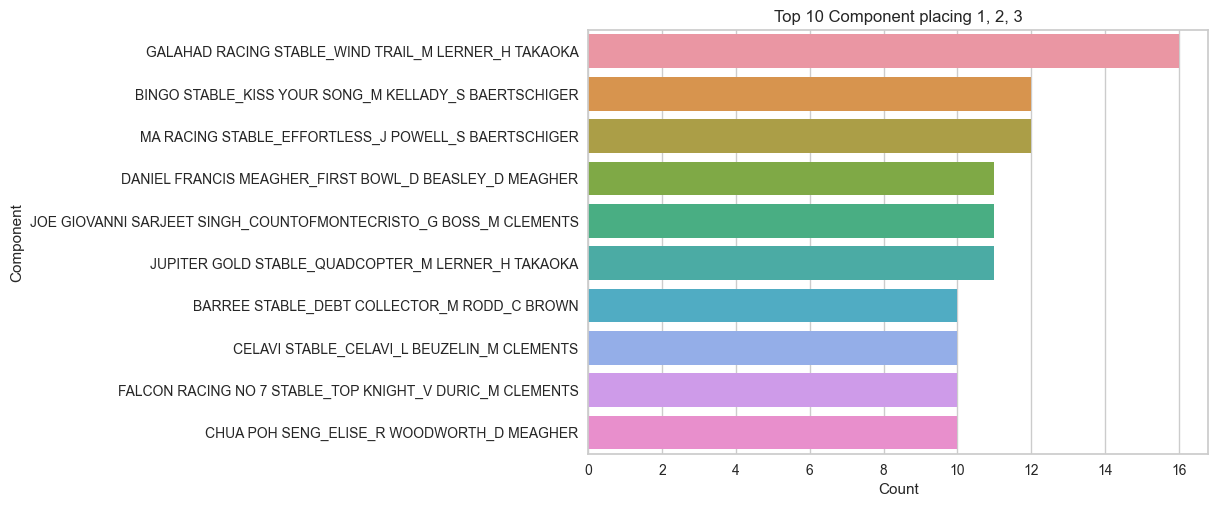

In [106]:
hnv1 = df.loc[df['Pl']==0]
hnv1 = hnv1[['Owner','horse_name','jockey','trainer']].groupby(by= hnv1['Pl']).value_counts().sort_values(ascending=False)
hnv1 = pd.DataFrame(hnv1)
hnv1.head(10)
hnv1.reset_index(inplace=True)
hnv1['combined'] = hnv1['Owner'] + '_' + hnv1['horse_name'] + '_' + hnv1['jockey']+ '_' + hnv1['trainer']
hnv1.drop(['Owner','horse_name','jockey','trainer'],axis=1,inplace=True)
column_headers = list(hnv1.columns.values)
hnv1.rename(columns={ 0: 'Count', 'combined': 'Component'}, inplace=True)
hnv1 = hnv1.head(10)

labels = hnv1['Component']
counts = hnv1['Count']
sns.barplot(x=counts,y=labels).set(title='Top 10 Component placing 1, 2, 3')
plt.show()

# Scenario 1: Running ML model witth 4 seperate features

Change All 4 features ID (Horse ID, Jockey ID, Trainer ID & Owner ID) into frequency encoding.

In [107]:
# Horse ID Frequency Encoding
# group by frequency
fq_horse = df.groupby('horse_id').size()/len(df)
# mapping values to dataframe
df.loc[:, "{}_freq_encode".format('horse_id')] = df['horse_id'].map(fq_horse)
# drop original column.
df = df.drop(['horse_id'], axis=1)

# Jockey ID Frequency Encoding
# group by frequency
fq_jockey = df.groupby('jockey_id').size()/len(df)
# mapping values to dataframe
df.loc[:, "{}_freq_encode".format('jockey_id')] = df['jockey_id'].map(fq_jockey)
# drop original column.
df = df.drop(['jockey_id'], axis=1)

# Trainer ID Frequency Encoding
# group by frequency
fq_trainer = df.groupby('trainer_id').size()/len(df)
# mapping values to dataframe
df.loc[:, "{}_freq_encode".format('trainer_id')] = df['trainer_id'].map(fq_trainer)
# drop original column.
df = df.drop(['trainer_id'], axis=1)

# Owner ID Frquency Encoding
# group by frequency
fq_owner = df.groupby('owner_id').size()/len(df)
# mapping values to dataframe
df.loc[:, "{}_freq_encode".format('owner_id')] = df['owner_id'].map(fq_owner)
# drop original column.
df = df.drop(['owner_id'], axis=1)

In [108]:
# Recheck the dataframe with all 4 features with frequency encoding
df.head()

,Pl,horse_name,Track,jockey,trainer,Owner,Last 800m,Last 400m,total second to finish,horse_id_freq_encode,jockey_id_freq_encode,trainer_id_freq_encode,owner_id_freq_encode
0,1,A LA VICTORY,1.2,K A'ISISUHAIRI,J PETERS,CHINA HORSE CLUB STABLE,8.0,9.0,71.0,0.000066,0.034776,0.036676,0.004507
1,1,A LA VICTORY,1.2,K A'ISISUHAIRI,J PETERS,CHINA HORSE CLUB STABLE,8.0,9.0,71.0,0.000066,0.034776,0.036676,0.004507
2,1,A LA VICTORY,1.2,SY MOON,J PETERS,CHINA HORSE CLUB STABLE,8.0,7.0,70.0,0.000066,0.001812,0.036676,0.004507
3,0,A LOT IN HAND,1.1,APP CK NG,HK TAN,HAPPY LIFE STABLE,3.0,3.0,67.0,0.000133,0.011666,0.005060,0.001016
4,1,A LOT IN HAND,1.2,TH KOH,HK TAN,HAPPY LIFE STABLE,2.0,2.0,74.0,0.000133,0.024149,0.005060,0.001016


In [109]:
# Drop all 4 features by replacing features ID frequency encofing
df.drop(['horse_name','jockey','trainer','Owner'],axis=1,inplace=True)

In [110]:
# New Dataframe before using model 
df.head()

,Pl,Track,Last 800m,Last 400m,total second to finish,horse_id_freq_encode,jockey_id_freq_encode,trainer_id_freq_encode,owner_id_freq_encode
0,1,1.2,8.0,9.0,71.0,0.000066,0.034776,0.036676,0.004507
1,1,1.2,8.0,9.0,71.0,0.000066,0.034776,0.036676,0.004507
2,1,1.2,8.0,7.0,70.0,0.000066,0.001812,0.036676,0.004507
3,0,1.1,3.0,3.0,67.0,0.000133,0.011666,0.005060,0.001016
4,1,1.2,2.0,2.0,74.0,0.000133,0.024149,0.005060,0.001016


<AxesSubplot: >

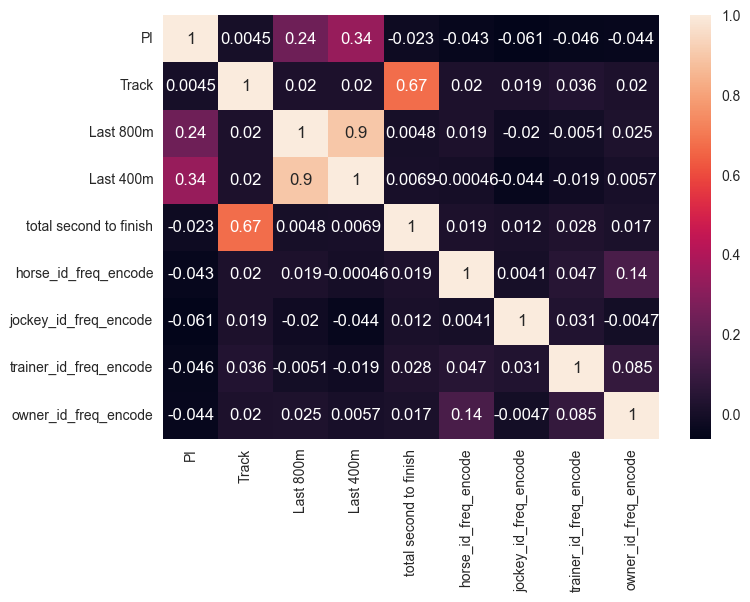

In [111]:
sns.heatmap(df.corr() , annot= True)

### Sample is imbalance. Using pycaret to simulate model accuracy and decide the baseline of using imbalance method and model.

In [112]:
# Using Imbalance Data
from pycaret.classification import *
s1= setup(df,target='Pl')

,Description,Value
0,Session id,2979
1,Target,Pl
2,Target type,Binary
3,Original data shape,"(45261, 9)"
4,Transformed data shape,"(45261, 9)"
5,Transformed train set shape,"(31682, 9)"
6,Transformed test set shape,"(13579, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [113]:
# Compare models using imbalance data
best1 =compare_models(cross_validation=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7772,0.8054,0.9124,0.8092,0.8577,0.3530,0.3669,0.2900
xgboost,Extreme Gradient Boosting,0.7735,0.7993,0.8994,0.8127,0.8539,0.3557,0.3649,1.5800
gbc,Gradient Boosting Classifier,0.7707,0.7983,0.9293,0.7942,0.8564,0.3041,0.3287,4.1300
et,Extra Trees Classifier,0.7649,0.7691,0.9134,0.7969,0.8512,0.3041,0.3209,1.4200
rf,Random Forest Classifier,0.7632,0.7808,0.9034,0.8004,0.8488,0.3114,0.3239,1.9800
ada,Ada Boost Classifier,0.7626,0.7825,0.9225,0.7901,0.8512,0.2815,0.3034,1.3400
lr,Logistic Regression,0.7576,0.7671,0.9153,0.7891,0.8475,0.2723,0.2911,0.2900
knn,K Neighbors Classifier,0.7517,0.7326,0.8733,0.8056,0.8381,0.3091,0.3138,0.2300
lda,Linear Discriminant Analysis,0.7514,0.7704,0.9657,0.7609,0.8511,0.1576,0.2126,0.0900
ridge,Ridge Classifier,0.7436,0.5252,0.9880,0.7461,0.8501,0.0711,0.1416,0.0600


In [114]:
print(best1)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2979, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


Top 5 Model using imbalance data measured by accuracy<br>
1. Light Gradient Boosting - 78.28%<br>
2. Extreme Gradient Boosting - 77.87%<br>
3. Gradient Boosting Classifier - 77.45%<br>
4. Ada Boost Classifier - 76.91%<br>
5. Random Forest Classifier - 76.74%


In [115]:
# Using SMOTE method to fix imbalance data
from pycaret.classification import *
s2= setup (df,target='Pl',fix_imbalance=True )

,Description,Value
0,Session id,5248
1,Target,Pl
2,Target type,Binary
3,Original data shape,"(45261, 9)"
4,Transformed data shape,"(60213, 9)"
5,Transformed train set shape,"(46634, 9)"
6,Transformed test set shape,"(13579, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [116]:
#Comparing models using SMOTE
best2=compare_models(cross_validation=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7724,0.7961,0.8849,0.8201,0.8513,0.3699,0.3748,3.6300
lightgbm,Light Gradient Boosting Machine,0.7716,0.7984,0.8712,0.8276,0.8488,0.3833,0.3854,0.4800
et,Extra Trees Classifier,0.7458,0.7601,0.8268,0.8276,0.8272,0.3464,0.3464,2.2300
rf,Random Forest Classifier,0.7417,0.7673,0.8125,0.8326,0.8224,0.3494,0.3498,3.2000
gbc,Gradient Boosting Classifier,0.7274,0.7781,0.7535,0.8589,0.8027,0.3680,0.3764,7.6300
ada,Ada Boost Classifier,0.7042,0.7592,0.7193,0.8558,0.7817,0.3339,0.3462,1.9200
knn,K Neighbors Classifier,0.6936,0.7220,0.7272,0.8351,0.7775,0.2931,0.3004,0.1500
lr,Logistic Regression,0.6892,0.7650,0.6755,0.8736,0.7619,0.3351,0.3587,0.5100
lda,Linear Discriminant Analysis,0.6832,0.7667,0.6630,0.8765,0.7549,0.3305,0.3571,0.1100
ridge,Ridge Classifier,0.6822,0.7000,0.6623,0.8756,0.7542,0.3285,0.3550,0.0600


In [117]:
# Using Random Over Sampler method to fix imbalance data
from pycaret.classification import *
s3= setup (df,target='Pl',fix_imbalance=True,
fix_imbalance_method=imblearn.over_sampling.RandomOverSampler())

,Description,Value
0,Session id,7101
1,Target,Pl
2,Target type,Binary
3,Original data shape,"(45261, 9)"
4,Transformed data shape,"(60213, 9)"
5,Transformed train set shape,"(46634, 9)"
6,Transformed test set shape,"(13579, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [118]:
best3=compare_models(cross_validation=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7656,0.7634,0.9186,0.7949,0.8522,0.2994,0.3186,1.8300
rf,Random Forest Classifier,0.7540,0.7768,0.8520,0.8206,0.8360,0.3447,0.3457,2.3300
xgboost,Extreme Gradient Boosting,0.7344,0.7987,0.7489,0.8722,0.8059,0.3933,0.4049,2.3400
lightgbm,Light Gradient Boosting Machine,0.7228,0.8061,0.7152,0.8862,0.7916,0.3916,0.4122,0.3700
gbc,Gradient Boosting Classifier,0.7058,0.7978,0.6845,0.8904,0.7740,0.3726,0.3999,5.5800
ada,Ada Boost Classifier,0.6965,0.7822,0.6821,0.8784,0.7679,0.3491,0.3730,1.5900
dt,Decision Tree Classifier,0.6920,0.6079,0.7860,0.7936,0.7898,0.2143,0.2143,0.3000
lr,Logistic Regression,0.6787,0.7686,0.6567,0.8757,0.7505,0.3242,0.3517,0.4200
lda,Linear Discriminant Analysis,0.6745,0.7702,0.6472,0.8786,0.7453,0.3220,0.3520,0.1200
ridge,Ridge Classifier,0.6719,0.6966,0.6443,0.8774,0.7430,0.3178,0.3478,0.0600


In [119]:
# Using Random Under Sampler method to fix imbalance data
from pycaret.classification import *
s4= setup (df,target='Pl',fix_imbalance=True,
fix_imbalance_method=imblearn.under_sampling.RandomUnderSampler())

,Description,Value
0,Session id,567
1,Target,Pl
2,Target type,Binary
3,Original data shape,"(45261, 9)"
4,Transformed data shape,"(35638, 9)"
5,Transformed train set shape,"(22074, 9)"
6,Transformed test set shape,"(13579, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [120]:
best4=compare_models(cross_validation=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7151,0.8020,0.6941,0.8952,0.7819,0.3894,0.4164,0.2200
xgboost,Extreme Gradient Boosting,0.7134,0.7929,0.6996,0.8871,0.7823,0.3796,0.4032,0.7900
gbc,Gradient Boosting Classifier,0.7026,0.7936,0.6778,0.8921,0.7703,0.3699,0.3990,2.2000
rf,Random Forest Classifier,0.6933,0.7793,0.6712,0.8841,0.7631,0.3505,0.3782,0.9000
et,Extra Trees Classifier,0.6906,0.7699,0.6776,0.8737,0.7633,0.3369,0.3603,0.8300
ada,Ada Boost Classifier,0.6890,0.7776,0.6672,0.8814,0.7595,0.3426,0.3700,0.6400
lr,Logistic Regression,0.6837,0.7678,0.6593,0.8810,0.7542,0.3356,0.3643,0.2600
lda,Linear Discriminant Analysis,0.6775,0.7696,0.6463,0.8844,0.7468,0.3312,0.3633,0.0700
knn,K Neighbors Classifier,0.6760,0.7366,0.6677,0.8609,0.7521,0.3057,0.3268,0.0900
ridge,Ridge Classifier,0.6755,0.7038,0.6439,0.8837,0.7450,0.3281,0.3603,0.0500


SMOTE method to fix imbalance data give the highest accuracy compare with RandomOver Sampler and RandomUnderSampler.

In [121]:
print(best2)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', ...)


Top 5 Model fixed imbalance data by SMOTE method measured by accuracy<br>
1. Extreme Gradient Boosting (xgboost) - 78.04%<br>
2. Light Gradient Boosting Machine (lightgbm) - 77.47%<br>
3. Random Forest Classifier (rf) - 74.35%<br>
4. Extra Trees Classifier (et) - 74.25%<br>
5. Gradient Boosting Classifier (gbc) - 73.32%

### Conclusion <br>

Hypothesis: Fixed imbalance data will give better accuracy compare to imbalance data. Hence, top 5 models in fixed imbalance data will be selected for ML training purpose. <br>
1. Extreme Gradient Boosting (xgboost) <br>
2. Light Gradient Boosting (lightgbm) <br>
3. Gradient Boosting Classifier (gbc) <br>
4. Random Forest Classifier (rf) <br>
5. Extra Trees Classifier (et)

Convert features as X and target as y

In [122]:
# To check data frame
df.head()

,Pl,Track,Last 800m,Last 400m,total second to finish,horse_id_freq_encode,jockey_id_freq_encode,trainer_id_freq_encode,owner_id_freq_encode
0,1,1.2,8.0,9.0,71.0,0.000066,0.034776,0.036676,0.004507
1,1,1.2,8.0,9.0,71.0,0.000066,0.034776,0.036676,0.004507
2,1,1.2,8.0,7.0,70.0,0.000066,0.001812,0.036676,0.004507
3,0,1.1,3.0,3.0,67.0,0.000133,0.011666,0.005060,0.001016
4,1,1.2,2.0,2.0,74.0,0.000133,0.024149,0.005060,0.001016


In [123]:
# Take Track, Last 800m, Last 400, Total Second to finish, Horse ID frequency encoding, Jockey ID frequency encoding, trainer ID frequency encoding & owner ID frequency encoding as features
# Take Pl as target
X = df.iloc[:, 1:8] 
y = df.iloc[:, 0]

In [124]:
X.head()

,Track,Last 800m,Last 400m,total second to finish,horse_id_freq_encode,jockey_id_freq_encode,trainer_id_freq_encode
0,1.2,8.0,9.0,71.0,0.000066,0.034776,0.036676
1,1.2,8.0,9.0,71.0,0.000066,0.034776,0.036676
2,1.2,8.0,7.0,70.0,0.000066,0.001812,0.036676
3,1.1,3.0,3.0,67.0,0.000133,0.011666,0.005060
4,1.2,2.0,2.0,74.0,0.000133,0.024149,0.005060


In [125]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45261 entries, 0 to 45471
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Track                   45261 non-null  float64
 1   Last 800m               45261 non-null  float64
 2   Last 400m               45261 non-null  float64
 3   total second to finish  45261 non-null  float64
 4   horse_id_freq_encode    45261 non-null  float64
 5   jockey_id_freq_encode   45261 non-null  float64
 6   trainer_id_freq_encode  45261 non-null  float64
dtypes: float64(7)
memory usage: 3.8 MB


In [126]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: Pl, dtype: int64

In [127]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 45261 entries, 0 to 45471
Series name: Pl
Non-Null Count  Dtype
--------------  -----
45261 non-null  int64
dtypes: int64(1)
memory usage: 1.7 MB


In [128]:
# To check target whether have imbalance data
y.value_counts()

1    33311
0    11950
Name: Pl, dtype: int64

<AxesSubplot: xlabel='Pl', ylabel='count'>

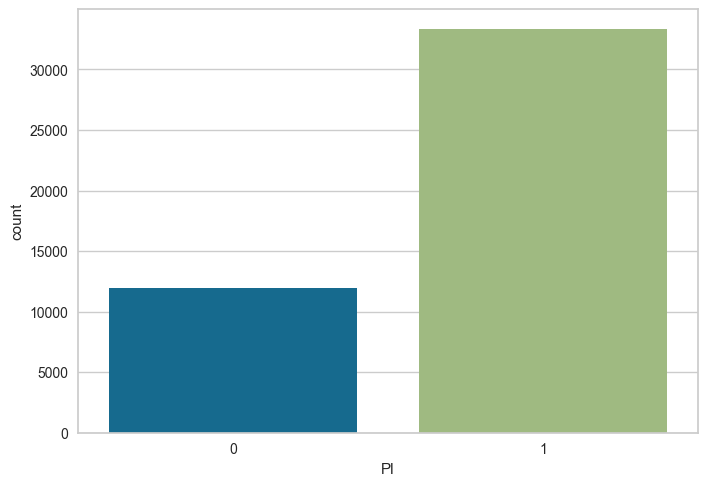

In [129]:
sns.countplot(data=df, x=y)

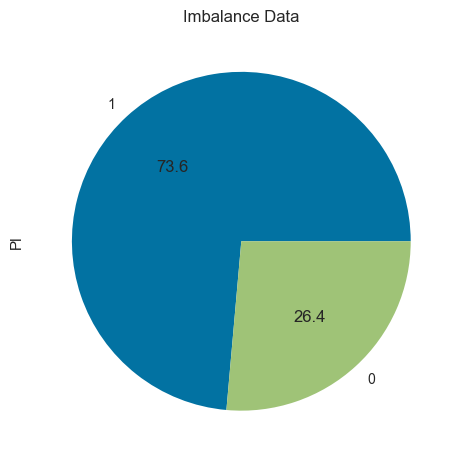

In [130]:
ax = y.value_counts().plot.pie(autopct = '%.1f')
title = ax.set_title("Imbalance Data")

In [131]:
# Using SMOTE method to fix imbalance data
from imblearn.over_sampling import SMOTE

rus = SMOTE(random_state=111)

X_res , y_res = rus.fit_resample(X , y)

y_res.value_counts()

1    33311
0    33311
Name: Pl, dtype: int64

<AxesSubplot: xlabel='Pl', ylabel='count'>

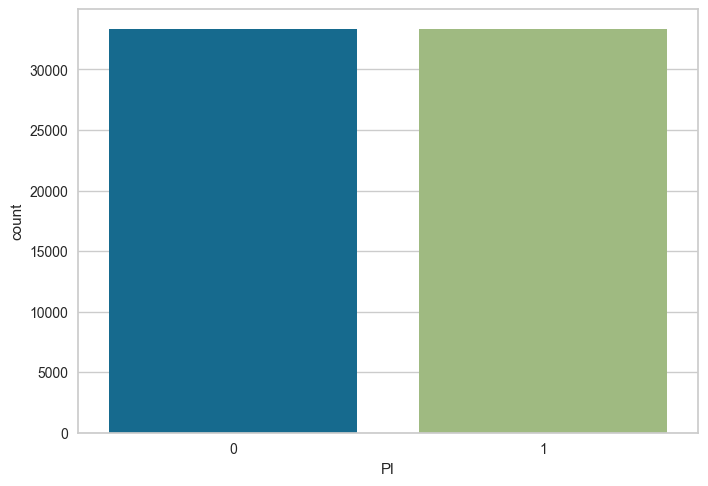

In [132]:
sns.countplot(data=df, x=y_res)

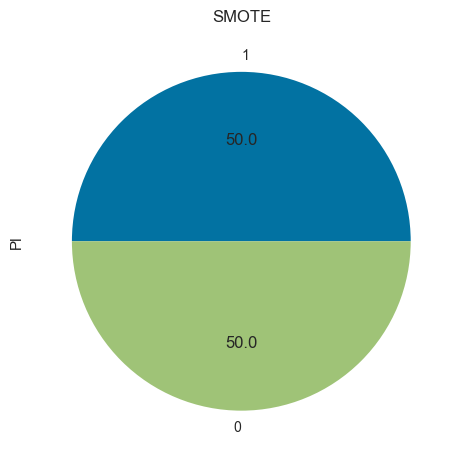

In [133]:
ax = y_res.value_counts().plot.pie(autopct = '%.1f')
title = ax.set_title("SMOTE")


Split to 80% as train and 20% as test for fixed imbalance data using SMOTE

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 111)

Split to 80% as train and 20% as test for imbalance data (id)

In [135]:
from sklearn.model_selection import train_test_split

X_id_train, X_id_test, y_id_train, y_id_test = train_test_split(X, y, test_size = 0.2, random_state = 111)

### To prove hypothesis that fixed imbalance data is better than imbalance data in terms of accuracy. Extreme Gradient Boosting (xgbosst) model will be selected and test to compare it. 

# Model 1: Extreme Gradient Boosting (xgboost) 


Use XGBoost model to compare imbalance data & fixed imbalance data using SMOTE

Scenario 1: Fixed Imbalance Data Using SMOTE

In [136]:
from sklearn import datasets
from sklearn import metrics
import xgboost as xgb
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix

In [137]:
xgb_SMOTE = xgb.XGBClassifier(random_state=111)
xgb_SMOTE.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', ...)

In [138]:
xgb_SMOTE_predict= xgb_SMOTE.predict(X_test)
xgb_SMOTE_predict


array([1, 1, 1, ..., 0, 0, 1])

In [139]:
df_xgb_SMOTE_predict=pd.DataFrame({'Actual': y_test, 'Predicted': xgb_SMOTE_predict})
df_xgb_SMOTE_predict.head()

,Actual,Predicted
35639,1,1
27108,1,1
2785,0,1
26508,0,0
4070,0,0


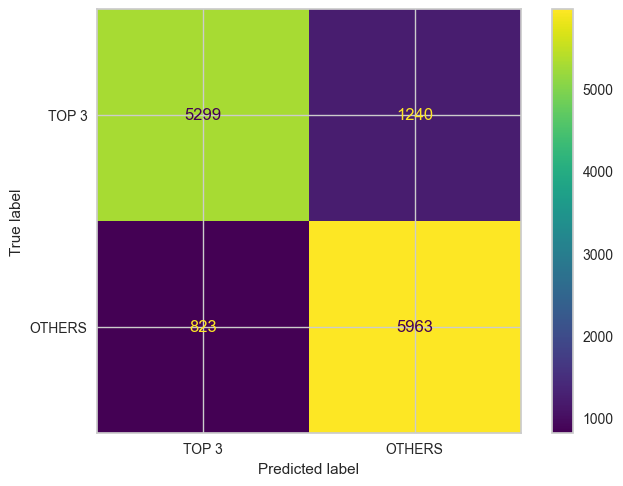

In [140]:
plot_confusion_matrix(xgb_SMOTE, 
                      X_test, 
                      y_test,
                      display_labels=["TOP 3", "OTHERS"])

In [141]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

print(metrics.confusion_matrix(y_test,xgb_SMOTE_predict))
print(metrics.classification_report(y_test,xgb_SMOTE_predict))
print("XGBoost Model: ", accuracy_score(y_test, xgb_SMOTE_predict))

[[5299 1240]
 [ 823 5963]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      6539
           1       0.83      0.88      0.85      6786

    accuracy                           0.85     13325
   macro avg       0.85      0.84      0.84     13325
weighted avg       0.85      0.85      0.84     13325

XGBoost Model:  0.8451782363977486


XGBoost Model with fixed imbalance date with SMOTE method give accuracy of 84.5%.


Scenario 2: Imbalance Data

In [142]:
xgb_id = xgb.XGBClassifier(random_state=111)
xgb_id.fit(X_id_train , y_id_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', ...)

In [143]:
xgb_id_predict= xgb_id.predict(X_test)
xgb_id_predict


array([1, 1, 1, ..., 0, 0, 1])

In [144]:
df_xgb_id_predict=pd.DataFrame({'Actual': y_test, 'Predicted': xgb_id_predict})
df_xgb_id_predict.head()

,Actual,Predicted
35639,1,1
27108,1,1
2785,0,1
26508,0,0
4070,0,0


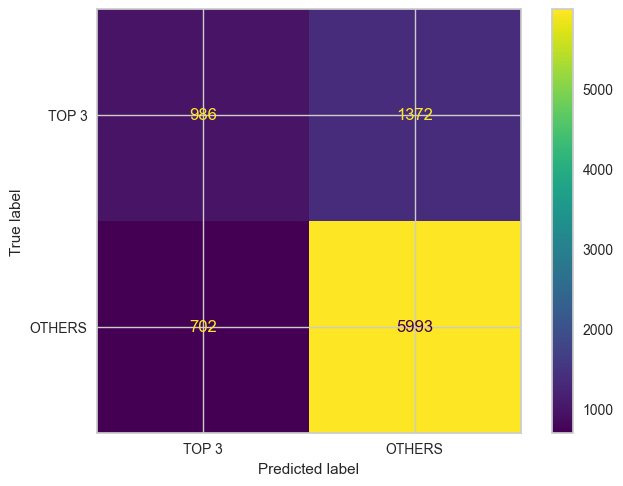

In [145]:
plot_confusion_matrix(xgb_id, 
                      X_id_test, 
                      y_id_test,
                      display_labels=["TOP 3", "OTHERS"])

In [146]:
print(metrics.confusion_matrix(y_test,xgb_id_predict))
print(metrics.classification_report(y_test,xgb_id_predict))
print("XGBoost Model with imbalance data: ", accuracy_score(y_test, xgb_id_predict))

[[2955 3584]
 [ 556 6230]]
              precision    recall  f1-score   support

           0       0.84      0.45      0.59      6539
           1       0.63      0.92      0.75      6786

    accuracy                           0.69     13325
   macro avg       0.74      0.68      0.67     13325
weighted avg       0.74      0.69      0.67     13325

XGBoost Model with imbalance data:  0.6893058161350845


XGBoost Model with imbalance data give accuracy of 68.9%.


## Conclusion <br>
Fixed imbalance data using SMOTE method give better accuracy of 84.5% compare to imbalance data that give 68.9%. All the remaining models will using fixed imbalance data using SMOTE method.

# Model 2: Light Gradient Boosting (lightgbm)

In [147]:
from lightgbm import LGBMClassifier
lightgbm= LGBMClassifier(random_state=111)
lightgbm.fit(X_train,y_train)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=111, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [148]:
lightgbm_predict= lightgbm.predict(X_test)
lightgbm_predict


array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [149]:
df_lightgbmpredict=pd.DataFrame({'Actual': y_test, 'Predicted': lightgbm_predict})
df_lightgbmpredict.head()

,Actual,Predicted
35639,1,1
27108,1,1
2785,0,1
26508,0,0
4070,0,0


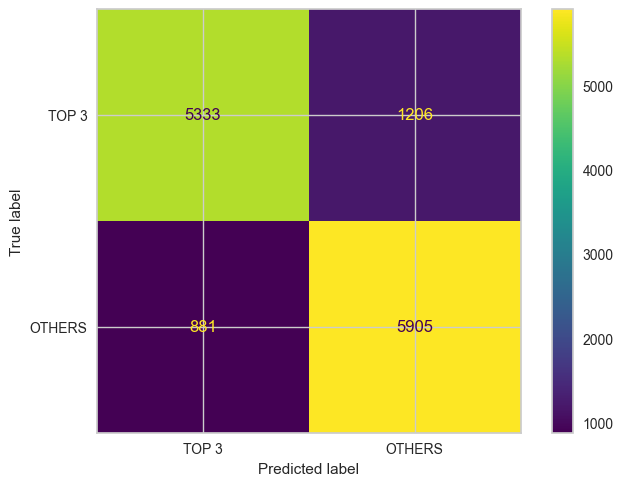

In [150]:
plot_confusion_matrix(lightgbm, 
                      X_test, 
                      y_test,
                      display_labels=["TOP 3", "OTHERS"])

In [151]:
print(metrics.confusion_matrix(y_test,lightgbm_predict))
print(metrics.classification_report(y_test,lightgbm_predict))
print("Light Gradient Boosting(lightgbm): ", accuracy_score(y_test, lightgbm_predict))

[[5333 1206]
 [ 881 5905]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      6539
           1       0.83      0.87      0.85      6786

    accuracy                           0.84     13325
   macro avg       0.84      0.84      0.84     13325
weighted avg       0.84      0.84      0.84     13325

Light Gradient Boosting(lightgbm):  0.8433771106941839


Light Gradient Boosting (lightgbm) give accuracy of 84.3%

# Model 3 Gradient Boosting Classifier (gbc)

In [152]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=111)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=111, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [153]:
gbc_predict= gbc.predict(X_test)
gbc_predict

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [154]:
df_gbcpredict=pd.DataFrame({'Actual': y_test, 'Predicted': gbc_predict})
df_gbcpredict.head()

,Actual,Predicted
35639,1,1
27108,1,1
2785,0,1
26508,0,0
4070,0,0


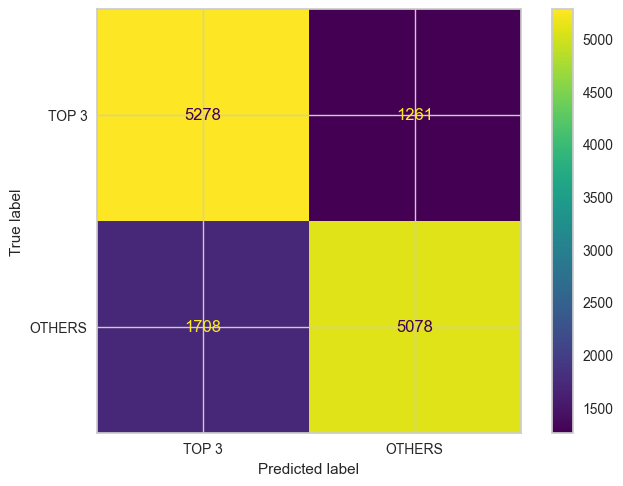

In [155]:
plot_confusion_matrix(gbc, 
                      X_test, 
                      y_test,
                      display_labels=["TOP 3", "OTHERS"])

In [156]:
print(metrics.confusion_matrix(y_test,gbc_predict))
print(metrics.classification_report(y_test,gbc_predict))
print("Gradient Boosting Classification (gbc): ", accuracy_score(y_test, gbc_predict))

[[5278 1261]
 [1708 5078]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      6539
           1       0.80      0.75      0.77      6786

    accuracy                           0.78     13325
   macro avg       0.78      0.78      0.78     13325
weighted avg       0.78      0.78      0.78     13325

Gradient Boosting Classification (gbc):  0.7771857410881801


Gradient Boosting Classifier (gbc) give accuracy of 77.7%

# Model 4 Random Forest Classifier (rf)

In [157]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy', random_state=111)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=111, verbose=0, warm_start=False)

In [158]:
rf_predict= rf.predict(X_test)
rf_predict


array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [159]:
df_rfpredict=pd.DataFrame({'Actual': y_test, 'Predicted': rf_predict})
df_rfpredict.head()

,Actual,Predicted
35639,1,1
27108,1,1
2785,0,1
26508,0,0
4070,0,0


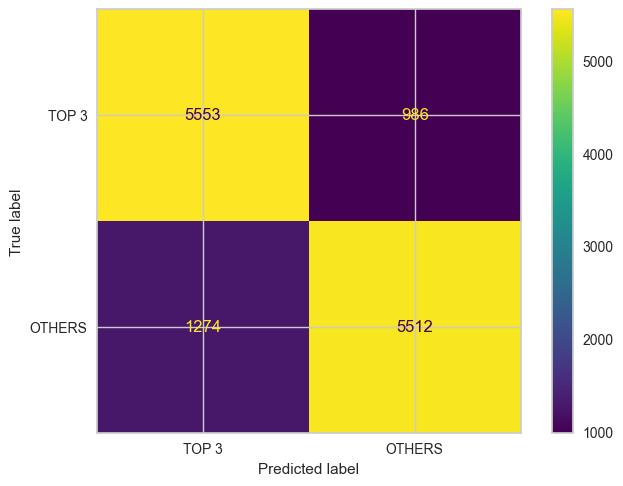

In [160]:
plot_confusion_matrix(rf, 
                      X_test, 
                      y_test,
                      display_labels=["TOP 3", "OTHERS"])

In [161]:
print(metrics.confusion_matrix(y_test,rf_predict))
print(metrics.classification_report(y_test,rf_predict))
print("Random Forest Classification (rf): ", accuracy_score(y_test, rf_predict))

[[5553  986]
 [1274 5512]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      6539
           1       0.85      0.81      0.83      6786

    accuracy                           0.83     13325
   macro avg       0.83      0.83      0.83     13325
weighted avg       0.83      0.83      0.83     13325

Random Forest Classification (rf):  0.8303939962476548


Random Forest Classification (rf) give accuracy of 83.0%

# Model 5 Extra Trees Classifier (et)

In [162]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_estimators=100, random_state=111)
et.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=None, oob_score=False,
                     random_state=111, verbose=0, warm_start=False)

In [163]:
et_predict= et.predict(X_test)
et_predict

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [164]:
df_etpredict=pd.DataFrame({'Actual': y_test, 'Predicted': et_predict})
df_etpredict.head()

,Actual,Predicted
35639,1,1
27108,1,1
2785,0,1
26508,0,0
4070,0,0


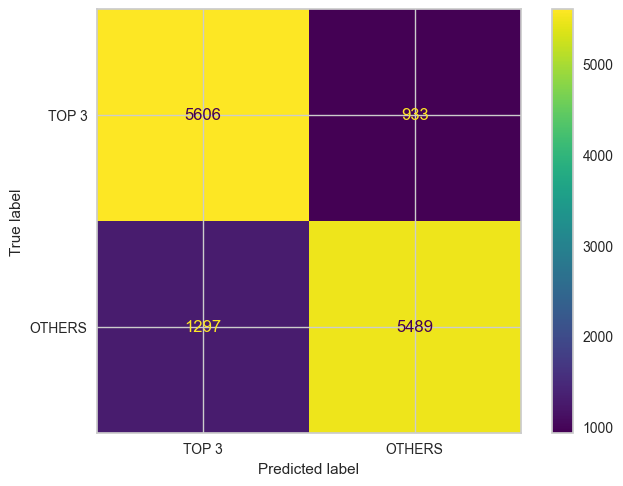

In [165]:
plot_confusion_matrix(et, 
                      X_test, 
                      y_test,
                      display_labels=["TOP 3", "OTHERS"])

In [166]:
print(metrics.confusion_matrix(y_test,et_predict))
print(metrics.classification_report(y_test,et_predict))
print("Extra Trees Classification (rf): ", accuracy_score(y_test, et_predict))

[[5606  933]
 [1297 5489]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      6539
           1       0.85      0.81      0.83      6786

    accuracy                           0.83     13325
   macro avg       0.83      0.83      0.83     13325
weighted avg       0.83      0.83      0.83     13325

Extra Trees Classification (rf):  0.8326454033771107


Extra Trees Classifier (et) give accuracy of 83.3%

### Conclusion <br>
Overall models accuracy using fixed imbalance data SMOTE method<br>

1. Extreme Gradient Boosting (xgboost) - 84.5%<br>
2. Light Gradient Boosting (lightgbm) - 84.3%<br>
3. Gradient Boosting Classifier (gbc) - 77.7%<br>
4. Random Forest Classifier (rf) - 83.0% <br>
5. Extra Trees Classifier (et) - 83.3% <br>

Extreme Gradient Boosting (xgboost) model is selected for hypertuning

## Hypertuning Model

Compare both emsemble model (Hard Voting & Stacking Classifier) & GridSearch CV by using highest accuracy on model selection (XGboost) to see whether can improve the accuracy.
1. HardVoting Classifier<br>
2. Stacking Classifier<br>
3. GridSearchCV(XGBoost)

## 1. Hard Voting Classifier

In [167]:
# create the sub models
estimatorsHV = []

LIGHTBOOST_model = LGBMClassifier(random_state=111)
estimatorsHV.append(('Lightbooster', LIGHTBOOST_model))

XGBOOST_model = xgb.XGBClassifier(random_state=111)
estimatorsHV.append(('XGBOOST', XGBOOST_model))

RANDOMFOREST_model = RandomForestClassifier(criterion='entropy', random_state=111)
estimatorsHV.append(('Random forest', RANDOMFOREST_model))

In [168]:
from sklearn.ensemble import VotingClassifier

for i in (LIGHTBOOST_model, XGBOOST_model, RANDOMFOREST_model):
    
    # train each individual model
    i.fit(X_train, y_train)
    
    # predict on test set
    y_pred = i.predict(X_test)
    
    # print accuracy results
    print(i, accuracy_score(y_test, y_pred))

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=111, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0) 0.8433771106941839
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=

In [169]:
# Using VotingClassifier() to build ensemble model with Hard Voting

ensemble_model = VotingClassifier(estimatorsHV)

ensemble_model.fit(X_train,y_train)

predicted_labels = ensemble_model.predict(X_test)            

print(metrics.classification_report(y_test, predicted_labels))
print("Hard Voting Classifier: ", accuracy_score(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      6539
           1       0.84      0.87      0.85      6786

    accuracy                           0.85     13325
   macro avg       0.85      0.85      0.85     13325
weighted avg       0.85      0.85      0.85     13325

Hard Voting Classifier:  0.8489305816135084


## 2. STACKING CLASSIFIER

In [170]:
from sklearn.ensemble import StackingClassifier

estimatorsSC= []
lightgbm_model = LGBMClassifier(random_state=111)
estimatorsSC.append(('lightgbm',lightgbm_model))

et_model = ExtraTreesClassifier(n_estimators=100, random_state=111)
estimatorsSC.append(('et', et_model))

rf_model = RandomForestClassifier(criterion='entropy', random_state=111)
estimatorsSC.append(('rf', rf_model))

sc = StackingClassifier(estimators= estimatorsSC, final_estimator=xgb.XGBClassifier(random_state=111))

In [171]:
sc_train= sc.fit(X_train,y_train)

predicted_labels_sc = sc.predict(X_test)            

print("Stacking Classifier: ", accuracy_score(y_test, predicted_labels_sc))

Stacking Classifier:  0.8591369606003753


## 3. GridSearchCV for cross validation of best model (XGboost)

In [172]:
from sklearn.model_selection import GridSearchCV # cross validation
param_grid2 = {
    'max_depth': [4,5,6],
    'learning_rate': [0.5,0.3,0.2],
    'gamma': [0,0.5,1],
    'scale_pos_weight': [0,1,2],
    'eval_metric': ['error']
}
modelxgb = GridSearchCV(param_grid=param_grid2, 
                             estimator=xgb_SMOTE , cv= 5, verbose=1)


In [173]:
xgb_m = modelxgb.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=False)

xgb_m.best_params_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


{'eval_metric': 'error',
 'gamma': 0.5,
 'learning_rate': 0.3,
 'max_depth': 6,
 'scale_pos_weight': 1}

In [174]:
result_GSCV = xgb_m.predict(X_test)

print(metrics.classification_report(y_test, result_GSCV))
print("GridSearchCV: ", accuracy_score(y_test, result_GSCV))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      6539
           1       0.83      0.88      0.85      6786

    accuracy                           0.85     13325
   macro avg       0.85      0.85      0.85     13325
weighted avg       0.85      0.85      0.85     13325

GridSearchCV:  0.8475046904315197


### Conclusion <br>
Befor tuning xgbopst: 84.5%<br>
Overall models accuracy after tuning<br>

1. GridsearchCV - 84.7% <br>
2. Hard Voting Classifier - 84.9% <br>
3. Stacking Classifier - 85.9% <br>

Final models to predict horse racing will be use under Stacking Classifier that increase from 84.5% to 85.9%

# Scenario 2: Running ML model with combine 4 seperate features into 1 feature.

4 features ID Mix into 1 ID in second data frame

In [175]:
df2['horse_new_id'] = df2['horse_id']+df2['jockey_id']+df2['trainer_id']+df2['owner_id']
df2.head(15)

,Pl,horse_name,Track,jockey,trainer,Owner,Last 800m,Last 400m,total second to finish,horse_id,jockey_id,trainer_id,owner_id,horse_new_id
0,1,A LA VICTORY,1.2,K A'ISISUHAIRI,J PETERS,CHINA HORSE CLUB STABLE,8.0,9.0,71.0,0001,001,001,001,0001001001001
1,1,A LA VICTORY,1.2,K A'ISISUHAIRI,J PETERS,CHINA HORSE CLUB STABLE,8.0,9.0,71.0,0001,001,001,001,0001001001001
2,1,A LA VICTORY,1.2,SY MOON,J PETERS,CHINA HORSE CLUB STABLE,8.0,7.0,70.0,0001,002,001,001,0001002001001
3,0,A LOT IN HAND,1.1,APP CK NG,HK TAN,HAPPY LIFE STABLE,3.0,3.0,67.0,0002,003,002,002,0002003002002
4,1,A LOT IN HAND,1.2,TH KOH,HK TAN,HAPPY LIFE STABLE,2.0,2.0,74.0,0002,004,002,002,0002004002002
5,1,A LOT IN HAND,1.2,M EWE,HK TAN,HAPPY LIFE STABLE,2.0,2.0,73.0,0002,005,002,002,0002005002002
6,0,A LOT IN HAND,1.2,M EWE,HK TAN,HAPPY LIFE STABLE,1.0,1.0,73.0,0002,005,002,002,0002005002002
7,1,A LOT IN HAND,1.2,APP CK NG,HK TAN,HAPPY LIFE STABLE,2.0,3.0,73.0,0002,003,002,002,0002003002002
8,1,A LOT IN HAND,1.1,D DAVID,HK TAN,HAPPY LIFE STABLE,1.0,2.0,66.0,0002,006,002,002,0002006002002
9,1,AABIR,1.0,V DURIC,M WALKER,JOHN ERIC GILES GALVIN,7.0,8.0,62.0,0003,007,003,003,0003007003003


In [176]:
# grouping by frequency
fq = df2.groupby('horse_new_id').size()/len(df2)
# mapping values to dataframe
df2.loc[:, "{}_freq_encode".format('horse_new_id')] = df2['horse_new_id'].map(fq)
# drop original column.
df2 = df2.drop(['horse_new_id'], axis=1)
df2.head(15)

,Pl,horse_name,Track,jockey,trainer,Owner,Last 800m,Last 400m,total second to finish,horse_id,jockey_id,trainer_id,owner_id,horse_new_id_freq_encode
0,1,A LA VICTORY,1.2,K A'ISISUHAIRI,J PETERS,CHINA HORSE CLUB STABLE,8.0,9.0,71.0,0001,001,001,001,0.000044
1,1,A LA VICTORY,1.2,K A'ISISUHAIRI,J PETERS,CHINA HORSE CLUB STABLE,8.0,9.0,71.0,0001,001,001,001,0.000044
2,1,A LA VICTORY,1.2,SY MOON,J PETERS,CHINA HORSE CLUB STABLE,8.0,7.0,70.0,0001,002,001,001,0.000022
3,0,A LOT IN HAND,1.1,APP CK NG,HK TAN,HAPPY LIFE STABLE,3.0,3.0,67.0,0002,003,002,002,0.000044
4,1,A LOT IN HAND,1.2,TH KOH,HK TAN,HAPPY LIFE STABLE,2.0,2.0,74.0,0002,004,002,002,0.000022
5,1,A LOT IN HAND,1.2,M EWE,HK TAN,HAPPY LIFE STABLE,2.0,2.0,73.0,0002,005,002,002,0.000044
6,0,A LOT IN HAND,1.2,M EWE,HK TAN,HAPPY LIFE STABLE,1.0,1.0,73.0,0002,005,002,002,0.000044
7,1,A LOT IN HAND,1.2,APP CK NG,HK TAN,HAPPY LIFE STABLE,2.0,3.0,73.0,0002,003,002,002,0.000044
8,1,A LOT IN HAND,1.1,D DAVID,HK TAN,HAPPY LIFE STABLE,1.0,2.0,66.0,0002,006,002,002,0.000022
9,1,AABIR,1.0,V DURIC,M WALKER,JOHN ERIC GILES GALVIN,7.0,8.0,62.0,0003,007,003,003,0.000022


After encoding categoric feature, drop the category feature

In [177]:
df2.drop(['horse_name','horse_id','jockey','jockey_id','trainer','trainer_id','Owner','owner_id'],axis=1,inplace=True)

In [178]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45261 entries, 0 to 45471
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pl                        45261 non-null  int64  
 1   Track                     45261 non-null  float64
 2   Last 800m                 45261 non-null  float64
 3   Last 400m                 45261 non-null  float64
 4   total second to finish    45261 non-null  float64
 5   horse_new_id_freq_encode  45261 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 3.4 MB


In [179]:
df2.head(15)

,Pl,Track,Last 800m,Last 400m,total second to finish,horse_new_id_freq_encode
0,1,1.2,8.0,9.0,71.0,0.000044
1,1,1.2,8.0,9.0,71.0,0.000044
2,1,1.2,8.0,7.0,70.0,0.000022
3,0,1.1,3.0,3.0,67.0,0.000044
4,1,1.2,2.0,2.0,74.0,0.000022
5,1,1.2,2.0,2.0,73.0,0.000044
6,0,1.2,1.0,1.0,73.0,0.000044
7,1,1.2,2.0,3.0,73.0,0.000044
8,1,1.1,1.0,2.0,66.0,0.000022
9,1,1.0,7.0,8.0,62.0,0.000022


Convert Feature to X and target to y by combining new ID

In [180]:
X2 = df2.iloc[:, 1:5] 
y2 = df2.iloc[:, 0]

In [181]:
X2

,Track,Last 800m,Last 400m,total second to finish
0,1.2,8.0,9.0,71.0
1,1.2,8.0,9.0,71.0
2,1.2,8.0,7.0,70.0
3,1.1,3.0,3.0,67.0
4,1.2,2.0,2.0,74.0
...,...,...,...,...
45467,1.2,5.0,3.0,98.0
45468,1.2,4.0,4.0,64.0
45469,1.2,4.0,6.0,110.0
45470,1.4,2.0,2.0,83.0


In [182]:
y2.head()

0    1
1    1
2    1
3    0
4    1
Name: Pl, dtype: int64

In [183]:
y2.info()

<class 'pandas.core.series.Series'>
Int64Index: 45261 entries, 0 to 45471
Series name: Pl
Non-Null Count  Dtype
--------------  -----
45261 non-null  int64
dtypes: int64(1)
memory usage: 1.7 MB


In [184]:
y2.value_counts()

1    33311
0    11950
Name: Pl, dtype: int64

<AxesSubplot: xlabel='Pl', ylabel='count'>

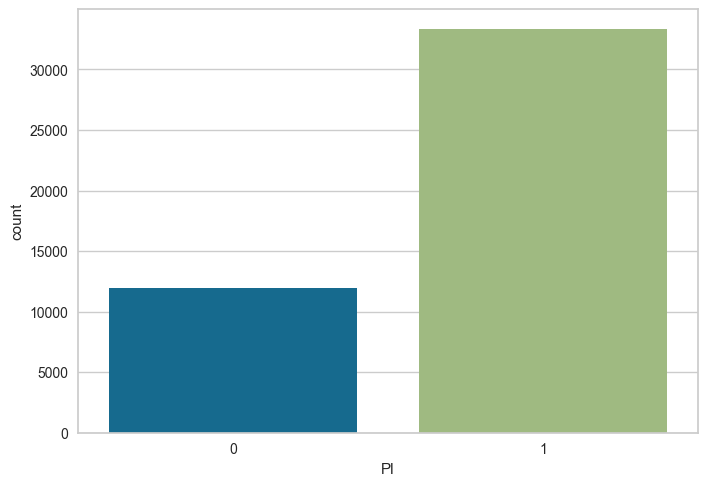

In [185]:
sns.countplot(data=df2, x=y2)

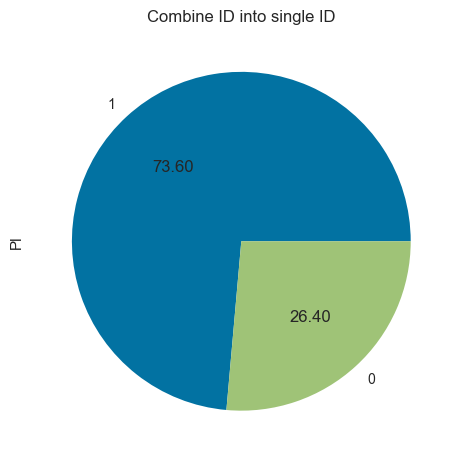

In [186]:
ax = y2.value_counts().plot.pie(autopct = '%.2f')
title = ax.set_title("Combine ID into single ID")

In previous scenario, fixed imbalance data SMOTE method & XGBoost model give the best accuracy and selected for this scenario.

In [187]:
rus2 = SMOTE(random_state=111)

X2_res , y2_res = rus2.fit_resample(X2 , y2)

y2_res.value_counts()

1    33311
0    33311
Name: Pl, dtype: int64

<AxesSubplot: xlabel='Pl', ylabel='count'>

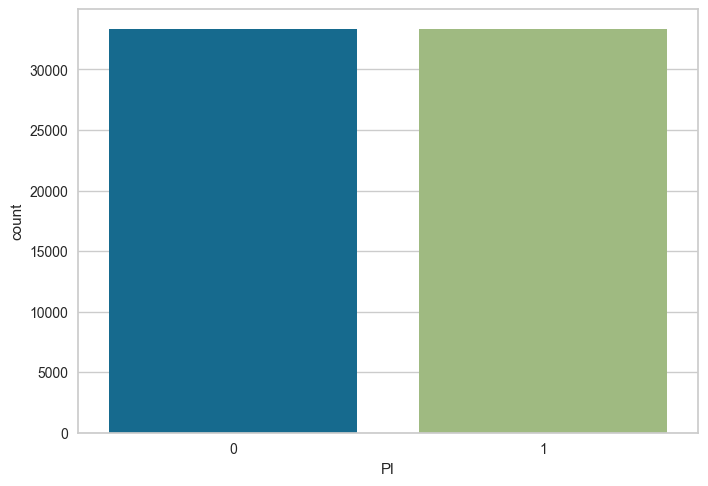

In [188]:
sns.countplot(data=df2, x=y2_res)

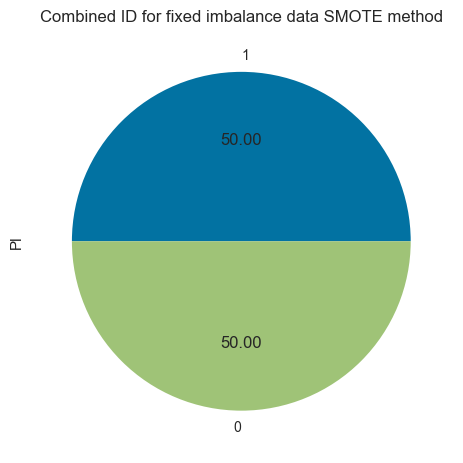

In [189]:
ax = y2_res.value_counts().plot.pie(autopct = '%.2f')
title = ax.set_title("Combined ID for fixed imbalance data SMOTE method")

Split to 80% as train and 20% as test

In [190]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_res, y2_res, test_size = 0.2, random_state = 111)

In [191]:
xgb2 = xgb.XGBClassifier(random_state=111)
xgb2.fit(X2_train , y2_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', ...)

In [192]:
xgb2_predict= xgb2.predict(X2_test)
xgb2_predict


array([1, 1, 1, ..., 0, 0, 1])

In [193]:
df_xgb2_predict=pd.DataFrame({'Actual': y2_test, 'Predicted': xgb2_predict})
df_xgb2_predict.head()

,Actual,Predicted
35639,1,1
27108,1,1
2785,0,1
26508,0,0
4070,0,0


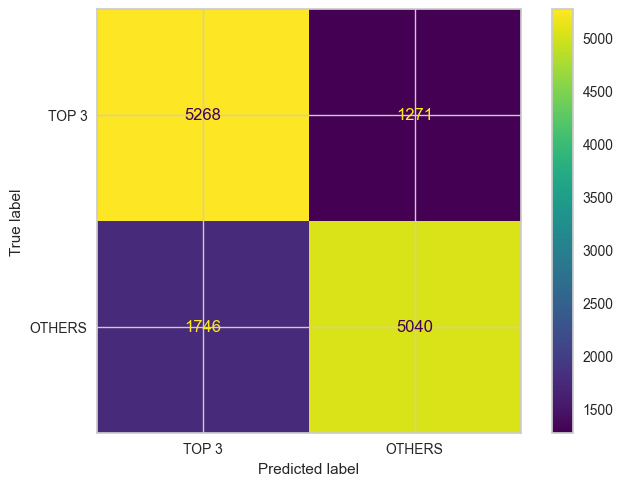

In [194]:
plot_confusion_matrix(xgb2, 
                      X2_test, 
                      y2_test,
                      display_labels=["TOP 3", "OTHERS"])

In [195]:
xgb2_predict = xgb2.predict(X2_test)

print(metrics.confusion_matrix(y2_test,xgb2_predict))
print(metrics.classification_report(y2_test,xgb2_predict))
print("XGBoost with single ID: ", accuracy_score(y2_test, xgb2_predict))

[[5268 1271]
 [1746 5040]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      6539
           1       0.80      0.74      0.77      6786

    accuracy                           0.77     13325
   macro avg       0.77      0.77      0.77     13325
weighted avg       0.78      0.77      0.77     13325

XGBoost with single ID:  0.7735834896810506


## Conclusion: Seperate ID give better accuracy of 84.5% compare to combine single ID of 77.4%. Hence Scenario 1 is choosen for final ML.